# Fish sleep and bacteria growth

## EDA

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Import the dc_stat_think module as dcst
import dc_stat_think as dcst

Zerba fish that have mutation in the melotinin gene on both chromosomes= <b> Mutant </b> <br>
Does not ahve mutation = <b>  Wild Type </b><br>
Mutation on one of the chromosomes = <b>  HeteroZygote </b>

active_bout =  Period of time when fish is consistently moving (minutes)

In [21]:
fish =  pd.read_csv('datasets/case_study/zebrafish.csv' , header = 4)
fish.head(2)

,genotype,bout_length,fish
0,het,12.0,1
1,het,33.0,1


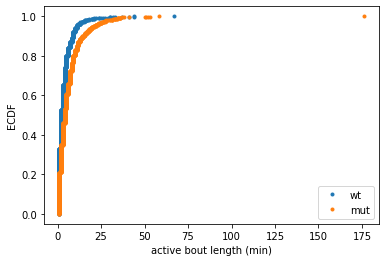

In [22]:
# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(fish[fish['genotype']=='wt']['bout_length'])
x_mut, y_mut = dcst.ecdf(fish[fish['genotype']== 'mut']['bout_length'])

# Plot the ECDFs
_ = plt.plot(x_wt, y_wt, marker='.', linestyle='none')
_ = plt.plot(x_mut, y_mut, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')
plt.show()

- The bout lengths appear Exponentially distributed, which implies that exiting an active bout to rest is a Poisson process; the fish have no apparent memory about when they became active.
- Yes! While not exactly Exponentially distributed, the ECDF has no left tail, and no discernible inflection point, which is very much like the Exponential CDF.

## Parameter Estimation

- Compute the mean active bout length for wild type and mutant, with 95% bootstrap confidence interval. 

In [24]:
bout_lengths_wt = fish[fish['genotype']=='wt']['bout_length']
bout_lengths_mut = fish[fish['genotype']== 'mut']['bout_length']

In [25]:
# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

In [26]:
# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

In [27]:
# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



## Hypothesis Test

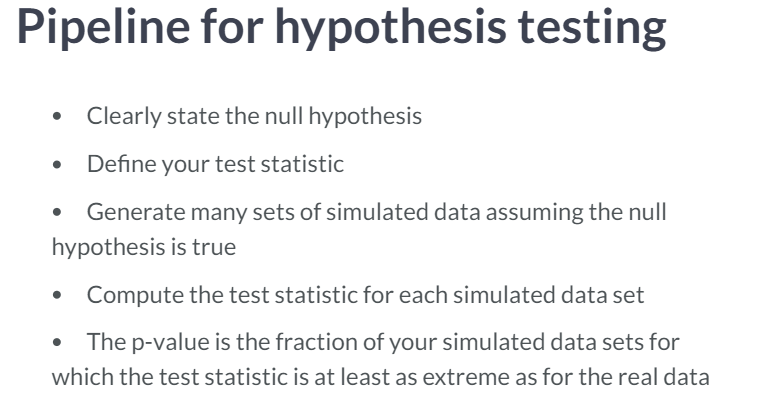

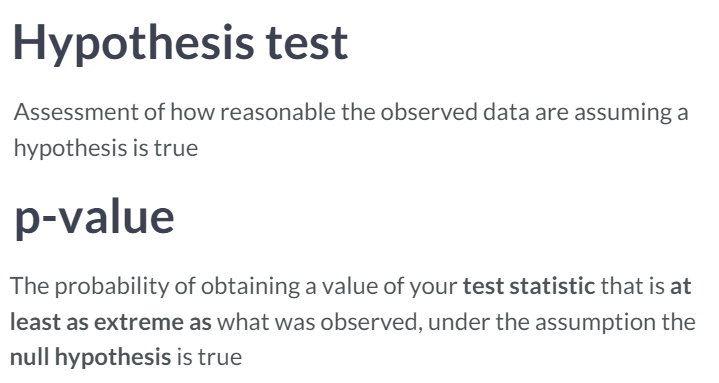

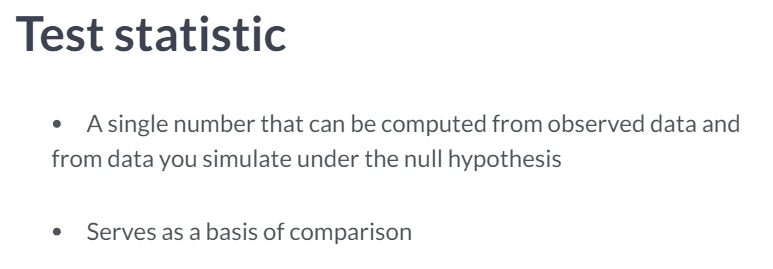


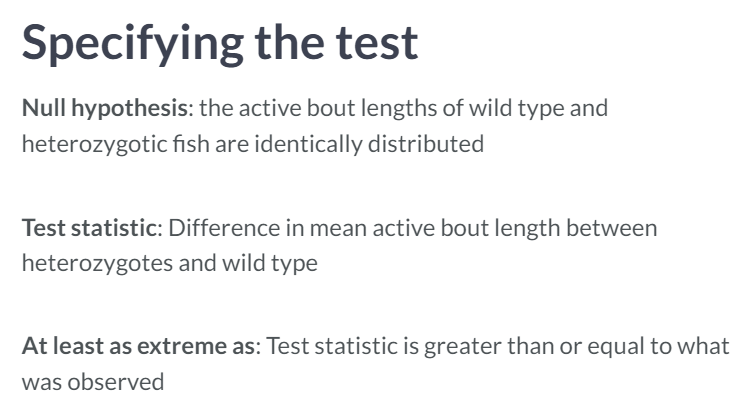

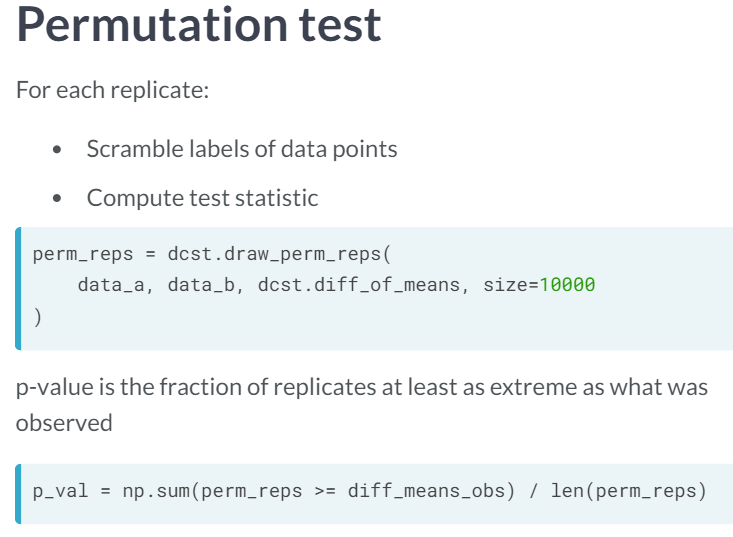

- No difference b/w HeteroZygotic and Wild Fish

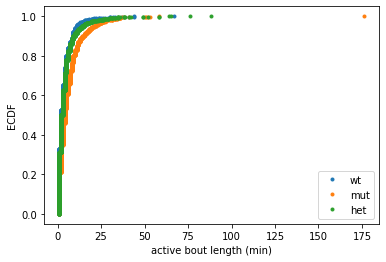

In [28]:
# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(fish[fish['genotype']=='wt']['bout_length'])
x_mut, y_mut = dcst.ecdf(fish[fish['genotype']== 'mut']['bout_length'])
x_het, y_het = dcst.ecdf(fish[fish['genotype']== 'het']['bout_length'])

# Plot the ECDFs
_ = plt.plot(x_wt, y_wt, marker='.', linestyle='none')
_ = plt.plot(x_mut, y_mut, marker='.', linestyle='none')
_ = plt.plot(x_het, y_het, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut' , 'het'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')
plt.show()

In [29]:
bout_lengths_wt = fish[fish['genotype']=='wt']['bout_length']
bout_lengths_mut = fish[fish['genotype']== 'mut']['bout_length']
bout_lengths_het = fish[fish['genotype']== 'het']['bout_length']

In [30]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

In [31]:
# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, 
                               dcst.diff_of_means, size=10000)

- Compute the p-value, defining "at least as extreme as" to be that the difference of means under the null hypothesis is greater than or equal to that which was observed experimentally.

In [32]:
# Compute the p-value: p_val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.0012


- A p-value of 0.001 suggests that the observed difference in means is unlikely to occur if heterozygotic and wild type fish have active bout lengths that are identically distributed.

<b> Permutation test </b>

- The permutation test has a pretty restrictive hypothesis, that the heterozygotic and wild type bout lengths are identically distributed. Now, use a bootstrap hypothesis test to test the hypothesis that the means are equal, making no assumptions about the distributions.

In [33]:
# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

In [34]:
# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean(bout_lengths_concat)

In [35]:
# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

In [36]:
# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted, np.mean, size=10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_reps
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

p-value = 0.0007


- We get a result of similar magnitude as the permutation test, though slightly smaller, probably because the heterozygote bout length distribution has a heavier tail to the right.